In [1]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


In [2]:
ls *.fits

C18O_2-1_minimal_cube.fits
CO2-1_cube.fits
CO2-1_cube_minimal.fits
downsampled_minimal_member.uid___A001_X1290_X46.Sgr_B2_DS_sci.spw0_1_2_3.mfs.I.manual.image.pbcor.fits
member.uid___A001_X1290_X46.Sgr_B2_DS_sci.spw0_1_2_3.mfs.I.manual.image.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw25_27_29_31.cont.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw25.cube.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw25.mfs.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw27.cube.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw27.mfs.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw29.cube.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw29.mfs.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw31.cube.I.pbcor.fits
member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw31.mfs.I.pbcor.fits
minimal_member.uid___A001_X1290_X46.Sgr_B2_DS_sci.spw0_1_2_3.mfs.I.manual.image.pbcor.fits


In [3]:
import warnings; warnings.filterwarnings('ignore')

In [27]:
%config InlineBackend.figure_format = 'svg'

In [4]:
%matplotlib inline

In [5]:
from astropy import units as u

In [6]:
from spectral_cube import SpectralCube

In [7]:
cube = SpectralCube.read('member.uid___A001_X1290_X48.Sgr_B2_DS_sci.spw25.cube.I.pbcor.fits')

In [8]:
cube

SpectralCube with shape=(1916, 2352, 1280) and unit=Jy / beam:
 n_x:   1280  type_x: RA---SIN  unit_x: deg    range:   266.823762 deg:  266.852852 deg
 n_y:   2352  type_y: DEC--SIN  unit_y: deg    range:   -28.436730 deg:  -28.389710 deg
 n_s:   1916  type_s: FREQ      unit_s: Hz     range: 216420586822.000 Hz:218290898022.587 Hz

In [63]:
siocube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=217.104984*u.GHz).spectral_slab(-100*u.km/u.s, 200*u.km/u.s)

In [ ]:
siopk = siocube.max(axis=0, how='slice')

In [10]:
siom0 = siocube.moment0(axis=0, how='slice')

In [ ]:
siom1 = siocube.with_mask(siocube>siocube[0:3].mad_std()*3).moment1(axis=0, how='slice')

In [21]:
import pylab as pl
pl.rcParams['figure.figsize'] = (15,30)
mpl.rcParams['figure.dpi'] = 300

INFO: Auto-setting vmin to  5.128e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.613e-02 [aplpy.core]


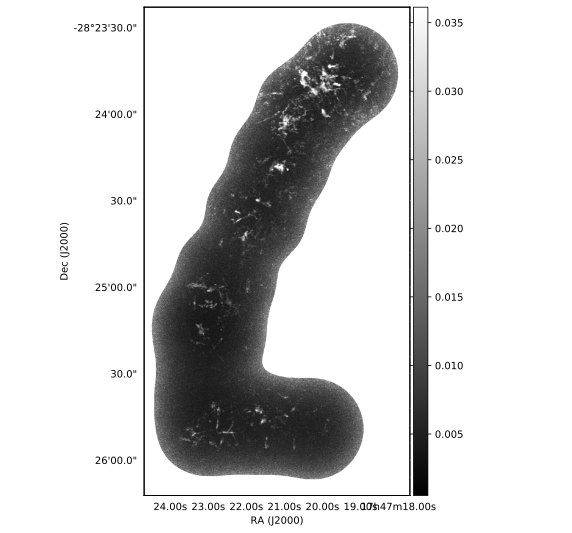

In [28]:
if hasattr(siopk,'FITSFigure'):
    del siopk.FITSFigure
siopk.quicklook()

INFO: Auto-setting vmin to -5.119e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.404e-01 [aplpy.core]


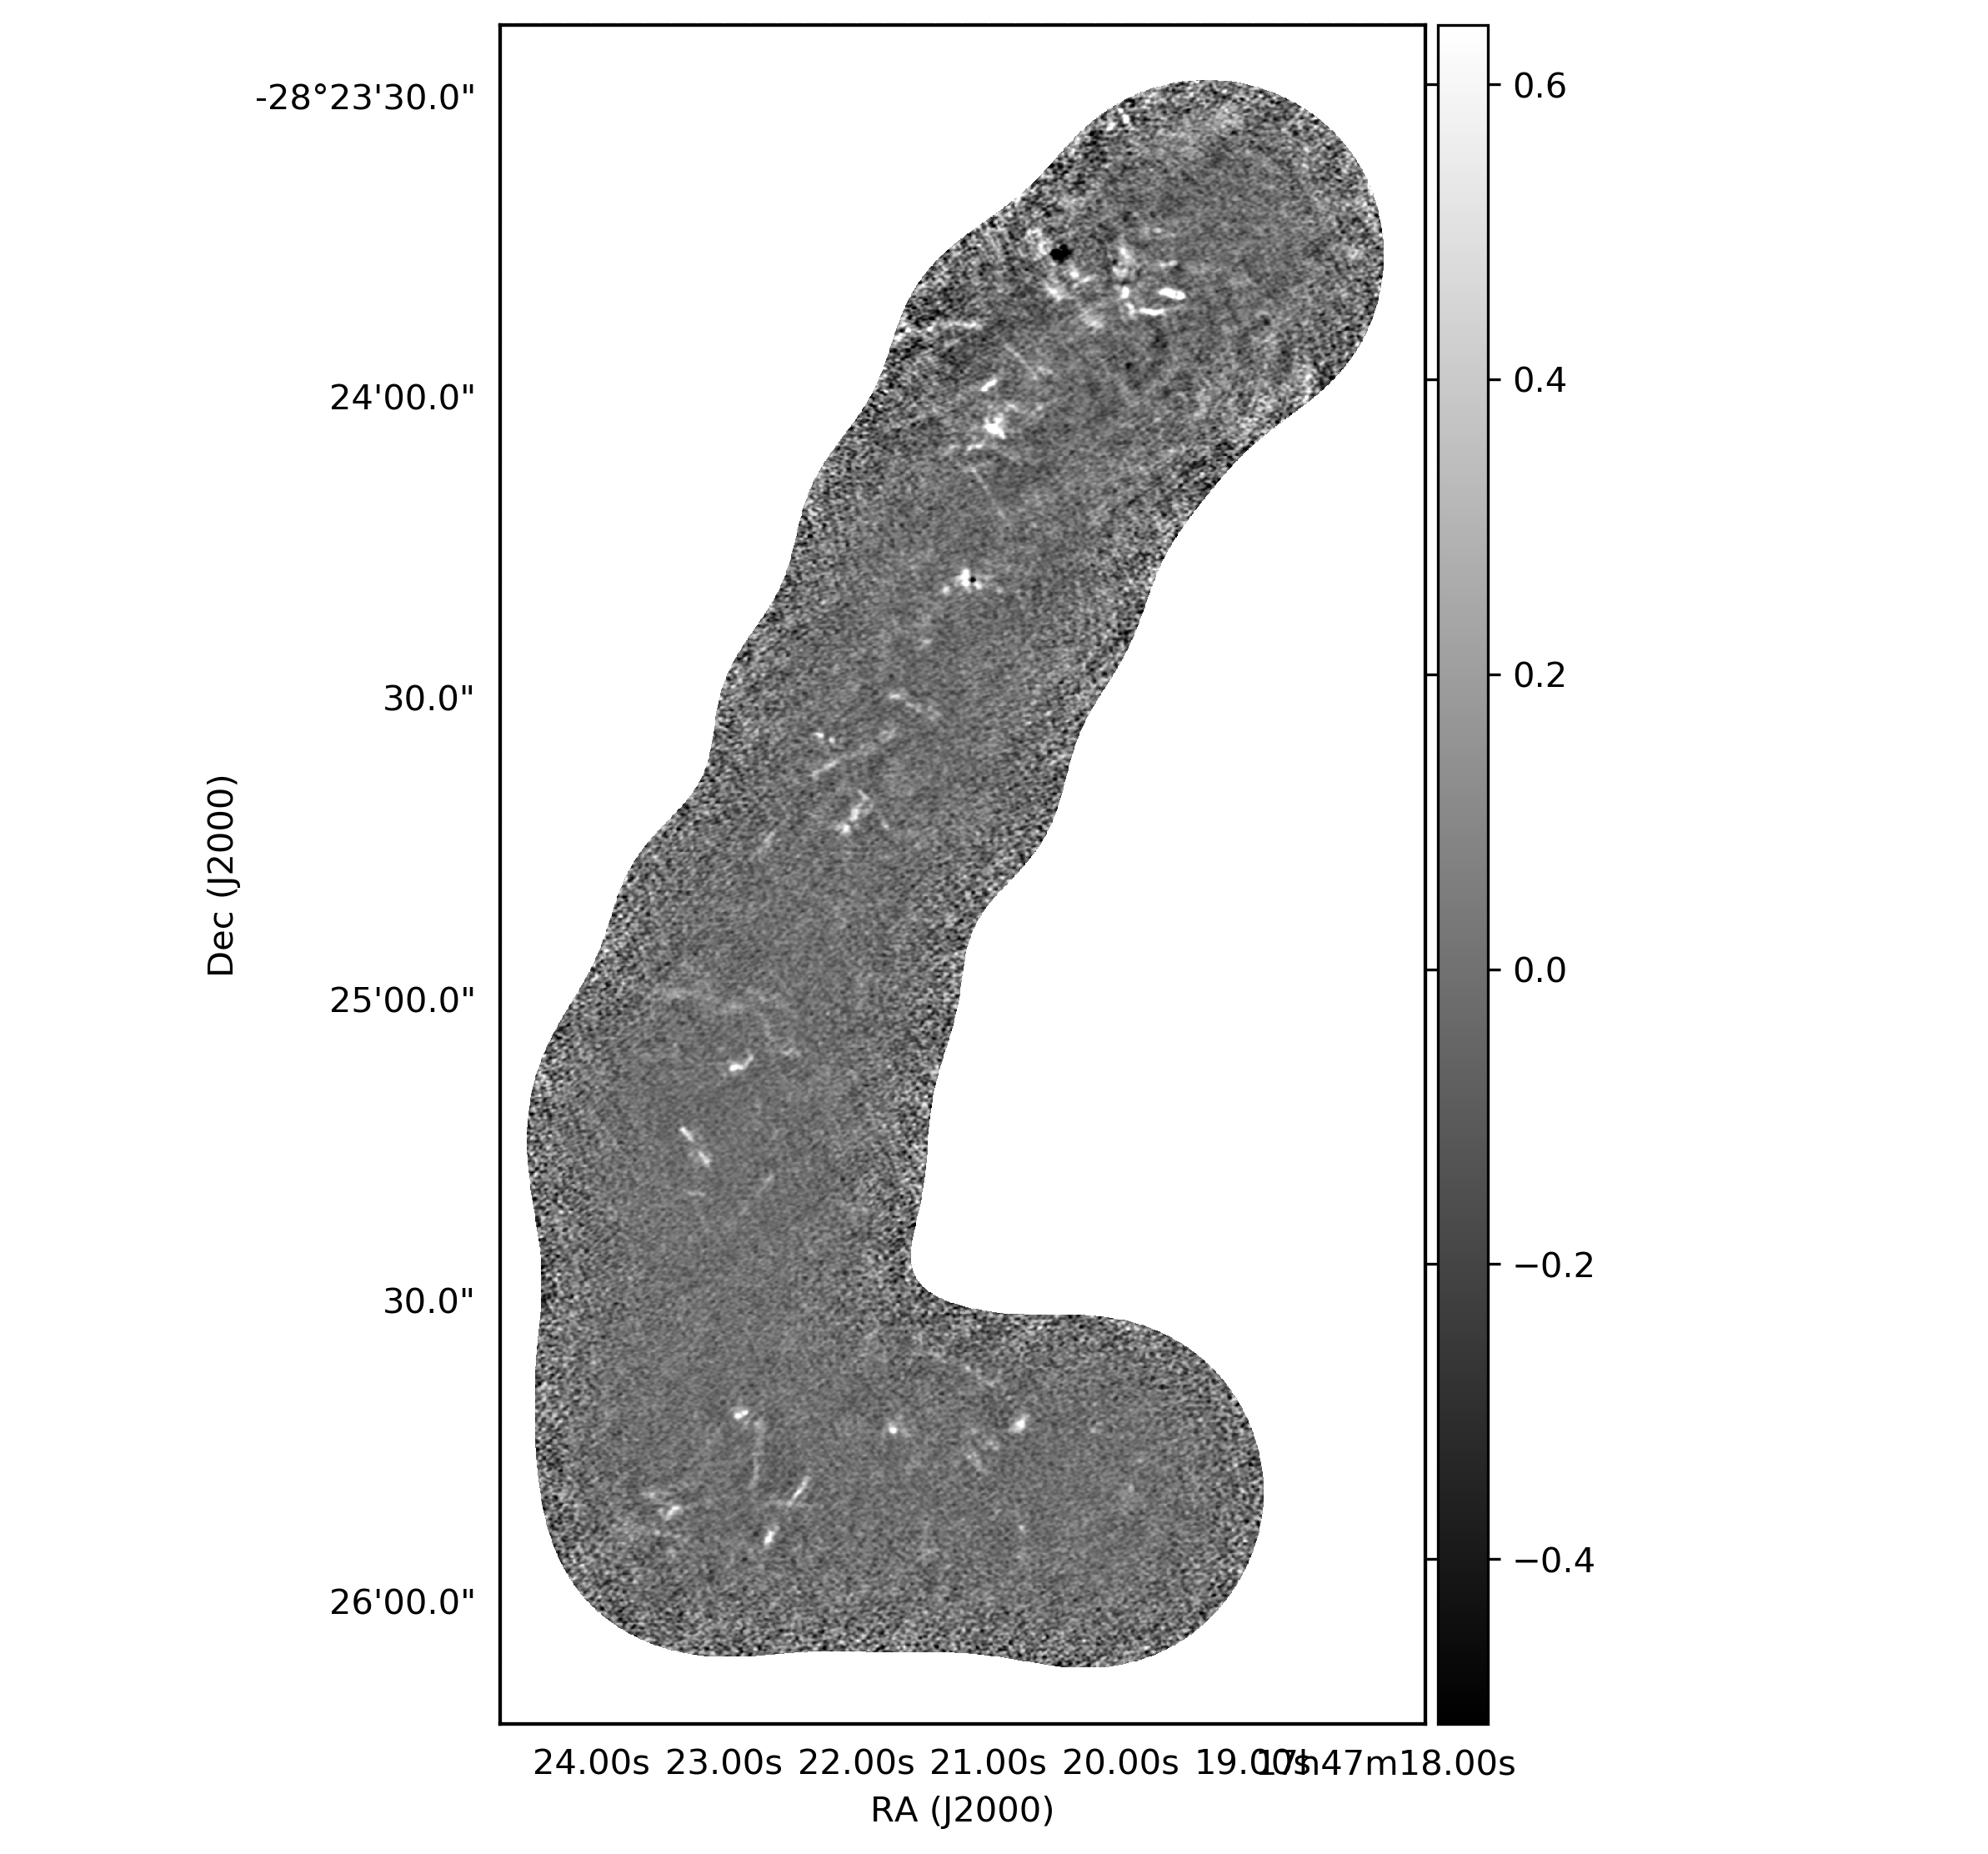

In [24]:
if hasattr(siom0,'FITSFigure'):
    del siom0.FITSFigure
siom0.quicklook()

INFO: Auto-setting vmin to -1.204e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.734e+02 [aplpy.core]


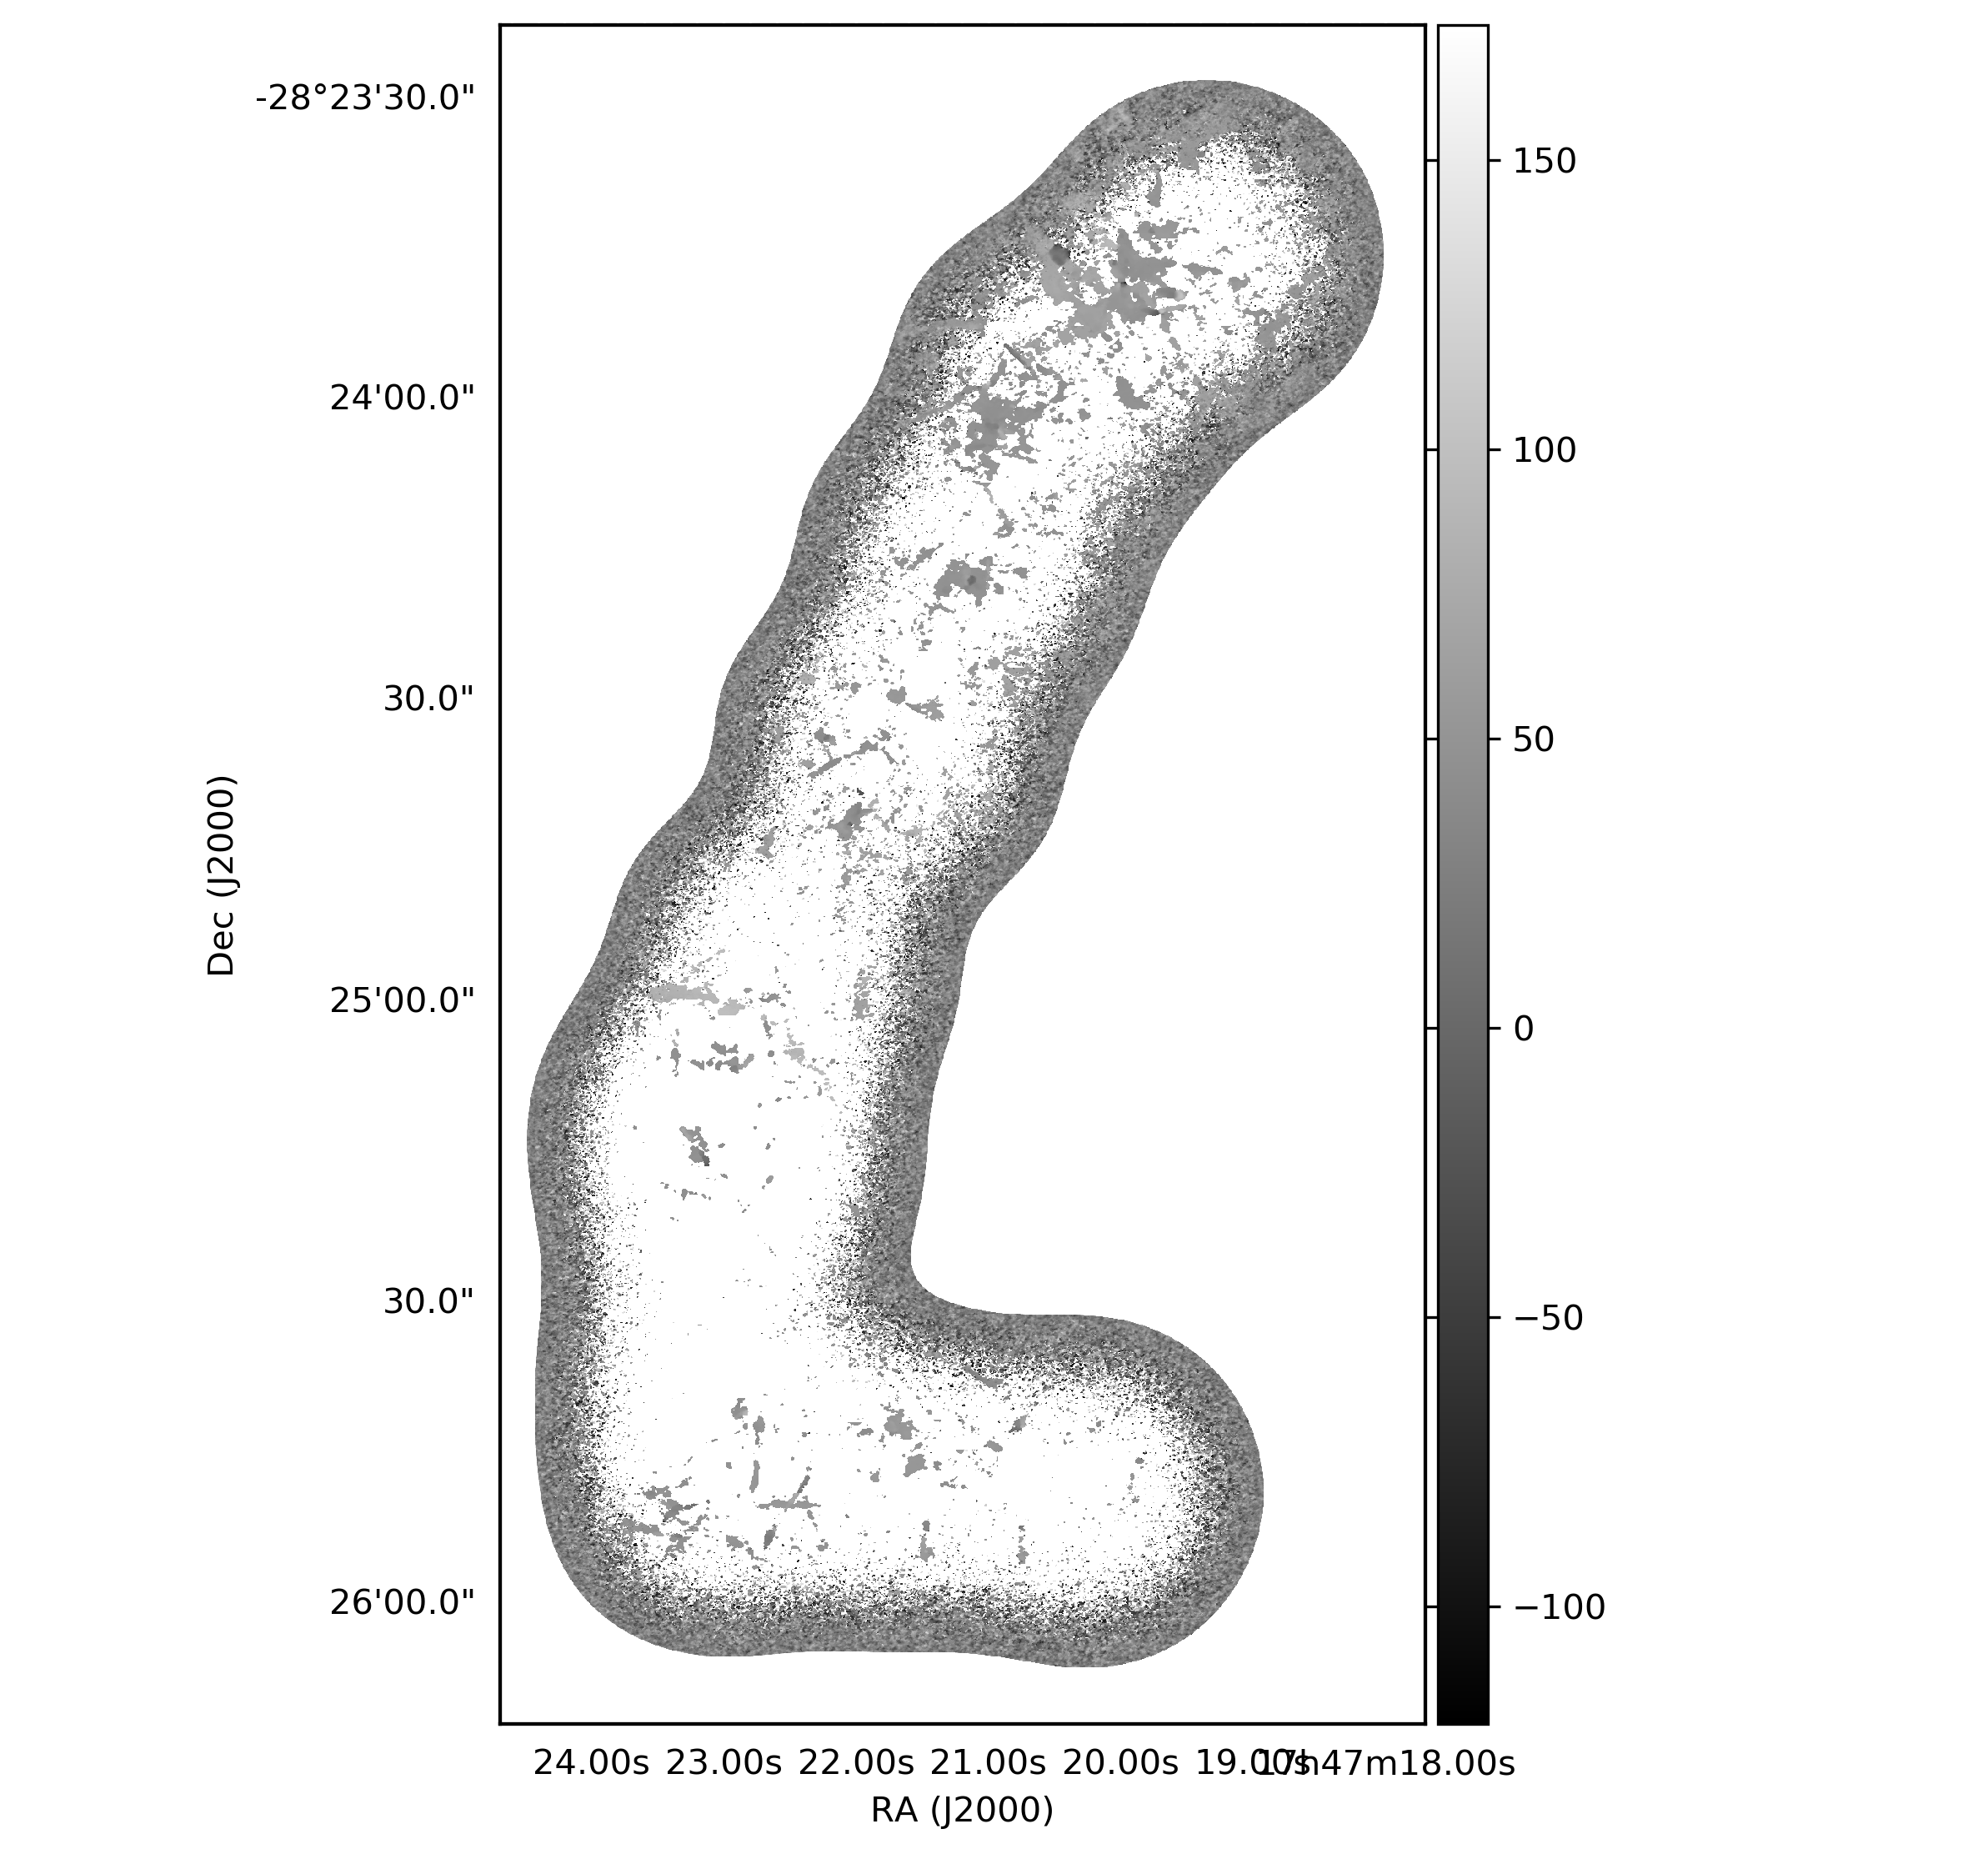

In [26]:
if hasattr(siom1,'FITSFigure'):
    del siom1.FITSFigure
siom1.quicklook()

In [35]:
pl.style.use(['dark_background'])


In [70]:
def cutoutimg(viewx, viewy, bluevel, redvel):
    pl.figure(figsize=(8,8))
    outflow2 = siocube[:,viewy,viewx]
    outflow2blue = outflow2.spectral_slab(*bluevel)
    outflow2red = outflow2.spectral_slab(*redvel)
    img = np.array([outflow2red.moment0().value, np.zeros(outflow2.shape[1:]), outflow2blue.moment0().value], dtype='float')

    pl.figure(figsize=(8,8))
    pl.imshow((img/img.max()).T.swapaxes(0,1), origin='lower', interpolation=None)
    pl.figure(figsize=(8,8))
    outflow2.mean(axis=(1,2)).quicklook()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 2400x2400 with 0 Axes>

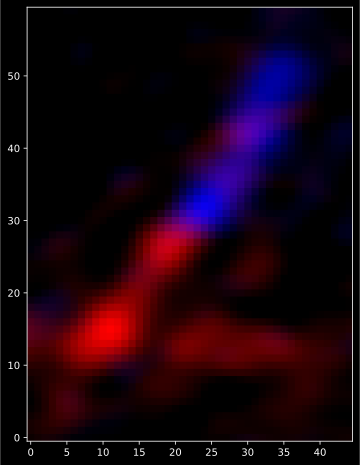

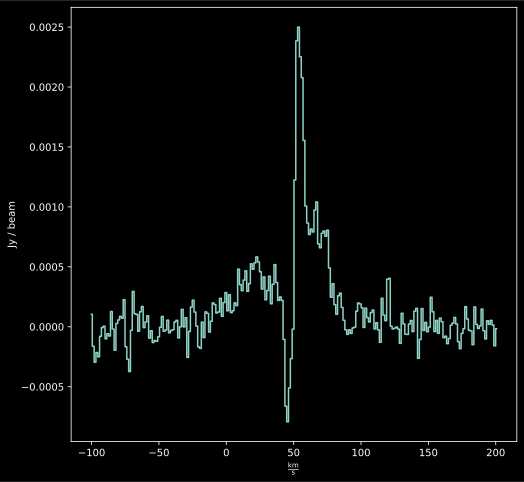

In [72]:
cutoutimg(slice(390, 435), slice(290,350), (-20*u.km/u.s, 50*u.km/u.s), (50*u.km/u.s, 110*u.km/u.s))

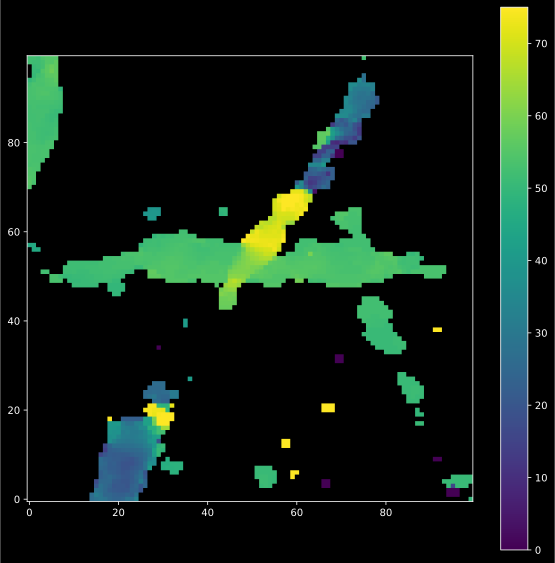

In [37]:
pl.figure(figsize=(10,10))
pl.imshow(siom1[250:350,350:450].value, origin='lower', interpolation=None, vmin=0, vmax=75)
pl.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 2400x2400 with 0 Axes>

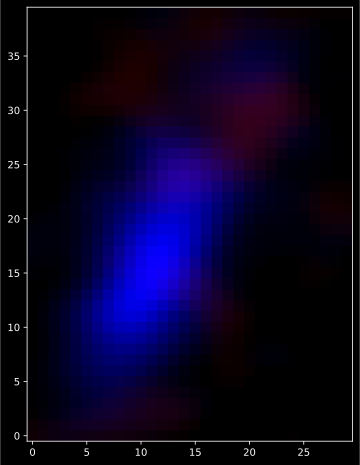

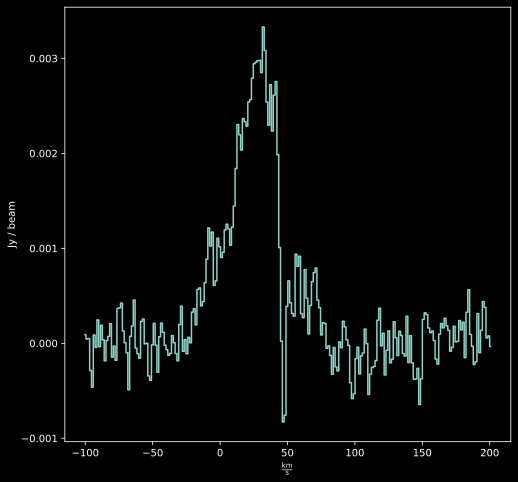

In [76]:
cutoutimg(slice(360, 390), slice(240,280), (-20*u.km/u.s, 50*u.km/u.s), (50*u.km/u.s, 110*u.km/u.s))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 2400x2400 with 0 Axes>

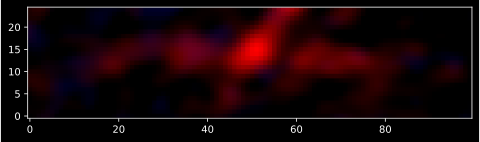

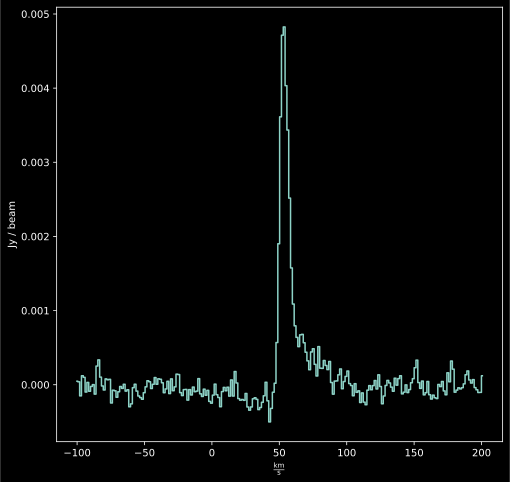

In [74]:
cutoutimg(slice(350, 450), slice(290,315), (-20*u.km/u.s, 50*u.km/u.s), (50*u.km/u.s, 110*u.km/u.s))

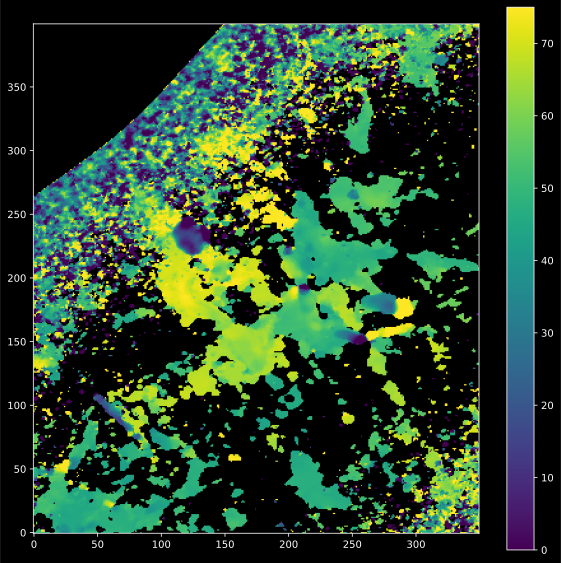

In [42]:
pl.figure(figsize=(10,10))
pl.imshow(siom1[1800:2200,650:1000].value, origin='lower', interpolation=None, vmin=0, vmax=75)
pl.colorbar()

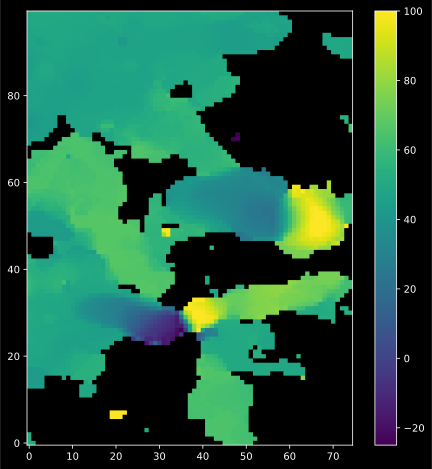

In [44]:
pl.figure(figsize=(8,8))
pl.imshow(siom1[1925:2025,875:950].value, origin='lower', interpolation=None, vmin=-25, vmax=100)
pl.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


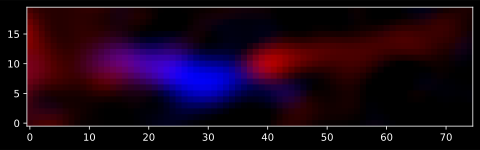

In [64]:
outflow1 = siocube[:,1945:1965,875:950]
outflow1blue = outflow1.spectral_slab(-50*u.km/u.s, 40*u.km/u.s)
outflow1red = outflow1.spectral_slab(40*u.km/u.s, 125*u.km/u.s)
img = np.array([outflow1red.moment0().value, np.zeros(outflow1.shape[1:]), outflow1blue.moment0().value], dtype='float')

pl.figure(figsize=(8,8))
pl.imshow(img.T.swapaxes(0,1), origin='lower', interpolation=None)

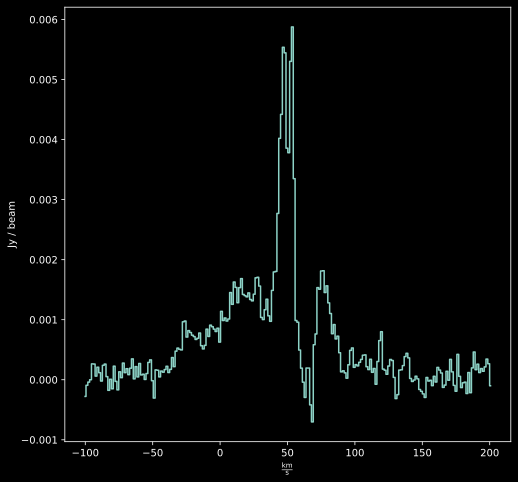

In [65]:
pl.figure(figsize=(8,8))
outflow1.mean(axis=(1,2)).quicklook()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


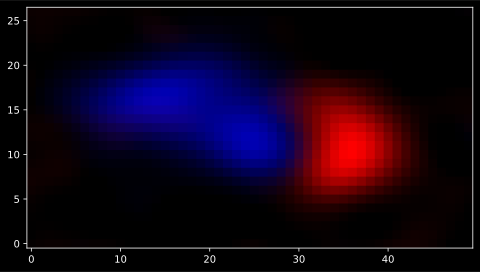

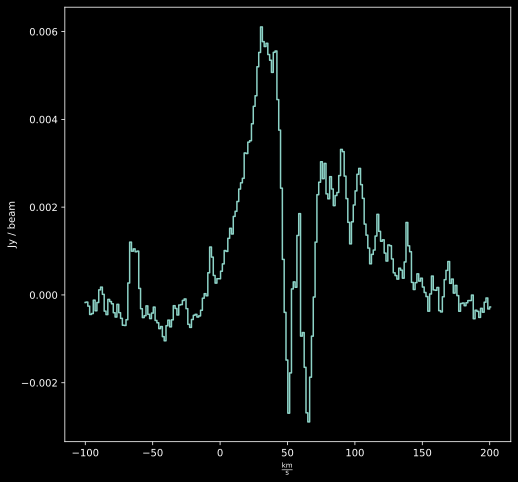

In [67]:
outflow2 = siocube[:,1965:1992,905:955]
outflow2blue = outflow2.spectral_slab(-25*u.km/u.s, 50*u.km/u.s)
outflow2red = outflow2.spectral_slab(50*u.km/u.s, 175*u.km/u.s)
img = np.array([outflow2red.moment0().value, np.zeros(outflow2.shape[1:]), outflow2blue.moment0().value], dtype='float')

pl.figure(figsize=(8,8))
pl.imshow((img/img.max()).T.swapaxes(0,1), origin='lower', interpolation=None)
pl.figure(figsize=(8,8))
outflow2.mean(axis=(1,2)).quicklook()